# Breast cancer mortality and survival prediction

#  Mortality Status Classifiers, their performances and Hyperparameters optimisations.

This notebook contains both the code and output cells of **Data Understanding and preparation** for the given Breast Cancer patients' dataset.

Author: Anshaff Ameer - 20230009 - w2084766

Peer Reviewed by: Pamudu Dilakwin Wijesingha

Tutors: Ms.Suvetha Suvendran and Ms.Uthpala Sooriya Arachchi




leveraged and reused code from code reuse session 01:

```
import pandas as pd
data = pd.read_csv('/DataFilePath/DataFileName.csv')

```



In [1]:
#importing pandas library
import pandas as pd
#loading the CW dataset into a variable "data_frame"
data_frame = pd.read_csv("/content/drive/MyDrive/IIT/Level 5/Mechine Learning/Course Work/prepared_classification_dataset.csv")

leveraged and reused code from code reuse session 01:
```
data.head(10)

```



In [2]:
#desplaying first 10 rows
data_frame.head(10)

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,68,0,0,0,0,1,3,1,4.0,1,1,24,1,0
1,50,0,1,1,2,0,2,1,35.0,1,1,14,5,0
2,58,0,2,2,4,0,2,1,63.0,1,1,14,7,0
3,58,0,0,0,0,1,3,1,18.0,1,1,2,1,0
4,47,0,1,0,1,1,3,1,41.0,1,1,3,1,0
5,51,0,0,0,0,0,2,1,20.0,1,1,18,2,0
6,51,0,0,0,0,3,1,1,8.0,1,1,11,1,0
7,40,0,1,0,1,0,2,1,30.0,1,1,9,1,1
8,40,0,3,2,4,1,3,1,103.0,1,1,20,18,0
9,69,0,3,2,4,3,1,0,32.0,1,1,21,12,0


leveraged and reused code from code reuse session 02:
```
feature_cols = ['input_feature1_name', 'input_feature2_name', 'input_feature3_name', 'input_feature4_name', ...]

X = data[feature_cols] # Features

y = data['target_feature_name']
```



In [3]:
#split dataset in features and target variable
feature_columns = ['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
                   'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']
X = data_frame[feature_columns] # Features
y = data_frame['Mortality_Status'] # Target variable


leveraged and reused code from tutorial session 2 week 3:
```
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

```



In [4]:
#scale the columns
from sklearn.preprocessing import StandardScaler
num_cols = ['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
print(X)

           Age  Sex  T_Stage  N_Stage  6th_Stage  Differentiated  Grade  \
0     1.558496    0        0        0          0               1      3   
1    -0.446537    0        1        1          2               0      2   
2     0.444589    0        2        2          4               0      2   
3     0.444589    0        0        0          0               1      3   
4    -0.780709    0        1        0          1               1      3   
...        ...  ...      ...      ...        ...             ...    ...   
3997  0.890152    0        0        0          0               0      2   
3998  0.221807    0        1        1          2               0      2   
3999  1.558496    1        1        0          1               0      2   
4000  0.444589    0        1        0          1               0      2   
4001 -0.892100    0        1        0          1               0      2   

      A_Stage  Tumor_Size  Estrogen_Status  Progesterone_Status  \
0           1   -1.259080       

<ipython-input-4-c608414ecde5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = scaler.fit_transform(X[num_cols])


leveraged and reused code from tutorial session 2 week 3:
```
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state=0)
print('Whole Data shape', pima.shape)
print('X1_train shape', X1_train.shape)
print('X1_test shape', X1_test.shape)


```



In [5]:
#split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
print('Whole Data shape', data_frame.shape)
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)

Whole Data shape (4002, 14)
X_train shape (2801, 13)
X_test shape (1201, 13)


In [6]:
list(data_frame.columns)

['Age',
 'Sex',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Reginol_Node_Positive',
 'Mortality_Status']

leveraged and reused code from code reuse session 2:
```
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
 y_pred_train=logreg.predict(X_train)

```



In [7]:
#initiate the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#fit the model
logreg.fit(X_train, y_train)


LogisticRegression()

In [8]:
import pandas as pd
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 101)
pd.set_option('display.width', 150)

In [9]:
#predict the model
y_predict = logreg.predict(X_test)
#to see the predicted values
y_predict

array([0, 0, 0, ..., 0, 1, 0])

leveraged and reused code from code reuse session 2:
```
Comparison_df=pd.DataFrame({'Actual' : y_test,  'Predicted' : y_pred})

Comparison_df

```



In [10]:
#create a comparison data frame Comparison_dataframe
Comparison_dataframe = pd.DataFrame({'Actual' : y_test,  'Predicted' : y_predict})
#display the data frame
Comparison_dataframe

,Actual,Predicted
2826,0,0
3099,0,0
672,0,0
18,0,0
1978,0,0
...,...,...
186,0,0
1193,0,0
2072,1,0
1106,0,1


In [11]:
#create a comparison data frame Comparison_df
Comparison_dataframe = pd.DataFrame({'Actual' : y_test,  'Predicted' : y_predict})
#display the data frame
Comparison_dataframe

,Actual,Predicted
2826,0,0
3099,0,0
672,0,0
18,0,0
1978,0,0
...,...,...
186,0,0
1193,0,0
2072,1,0
1106,0,1


leveraged and reused code from code reuse session 2:
```
from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels = logreg.classes_)

disp = ConfusionMatrixDisplay(cm, display_labels = logreg.classes_)

disp.plot()
```



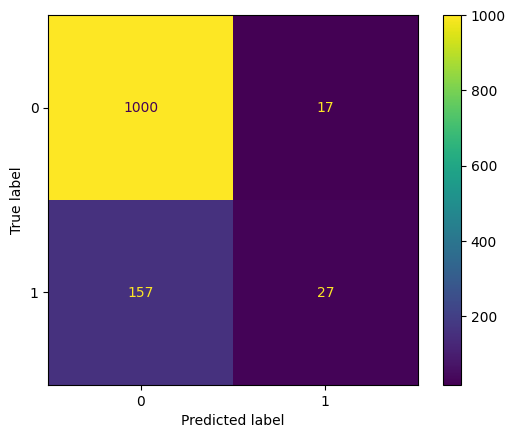

In [12]:
#plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#construct the matrix cm
cm = confusion_matrix(y_test, y_predict, labels = logreg.classes_)
#display the matrix
disp = ConfusionMatrixDisplay(cm, display_labels = logreg.classes_)
disp.plot()

leveraged and reused code from code reuse session 2:
```
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print ("The accuracy is: ", accuracy)
```



In [13]:
# Import the function to calculate accuracy score
from sklearn.metrics import accuracy_score
# Apply the function to find the correct predictions
accuracy = accuracy_score(y_test,y_predict)
# Display the accuracy
print ('The Logistic Regression Model Accuracy is: ',accuracy)



The Logistic Regression Model Accuracy is:  0.855120732722731


leveraged and reused code from code reuse session 2:
```
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
```



In [14]:
#import the function to generate the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1017
           1       0.61      0.15      0.24       184

    accuracy                           0.86      1201
   macro avg       0.74      0.57      0.58      1201
weighted avg       0.83      0.86      0.82      1201



leveraged and reused code from code reuse session 2:
```
from sklearn.metrics import RocCurveDisplay

logreg = RocCurveDisplay.from_estimator(logreg, X_test, y_test)
```



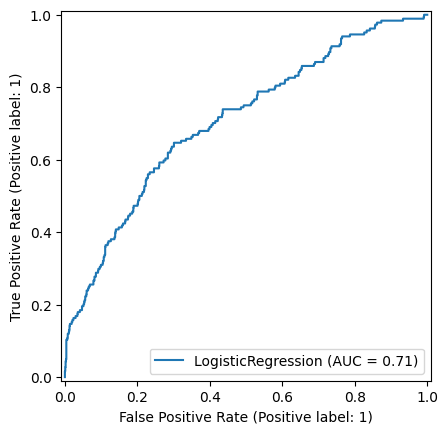

In [15]:
#import the function to desplay roc curve
from sklearn.metrics import RocCurveDisplay
#display the roc curve
logreg = RocCurveDisplay.from_estimator(logreg, X_test, y_test)

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
learnable Parameters {'C': 0.1, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.82      1017
           1       0.29      0.60      0.39       184

    accuracy                           0.72      1201
   macro avg       0.60      0.67      0.61      1201
weighted avg       0.82      0.72      0.75      1201


Confusion Matrix:



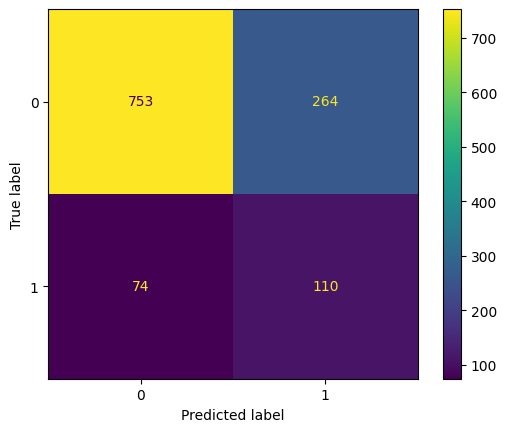

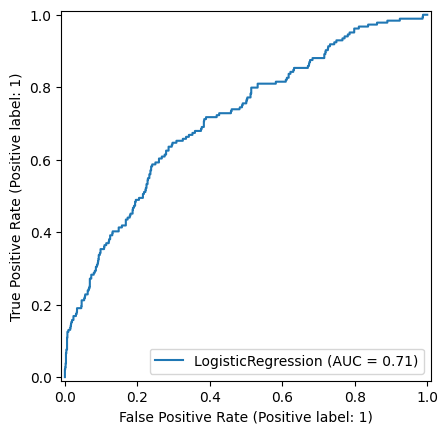

In [16]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid ={
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': ['balanced']
    }
lr = LogisticRegression()
grid = GridSearchCV(lr, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)
best_lr = grid.best_estimator_
y_pred = best_lr.predict(X_test)
print("Best Parameters:", grid.best_params_)
print("learnable Parameters", best_lr.get_params())
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n")
# Create confusion matrix
cm_lr = confusion_matrix(y_test, y_pred, labels=best_lr.classes_)
# Display the confusion matrix
disp_lr_cm = ConfusionMatrixDisplay(confusion_matrix = cm_lr, display_labels=best_lr.classes_)
disp_lr_cm.plot()
RocCurveDisplay.from_estimator(best_lr, X_test, y_test)

# **Building a Gaussian Naive Bayes Classifier Model with Scikit-learn**

leveraged and reused code from code reuse session 2:
```
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)
```



In [17]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred=nb.predict(X_test)

leveraged and reused code from code reuse session 2:
```
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
```



In [18]:
#generate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.08      0.15      1017
           1       0.16      0.99      0.28       184

    accuracy                           0.22      1201
   macro avg       0.57      0.53      0.21      1201
weighted avg       0.85      0.22      0.17      1201



leveraged and reused code from tutorial session 3 week 4:
```
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
nb_cm = confusion_matrix(y_test, y_pred, labels = nb.classes_)
nb_cm = ConfusionMatrixDisplay(nb_cm, display_labels = nb.classes_)
nb_cm.plot()

```



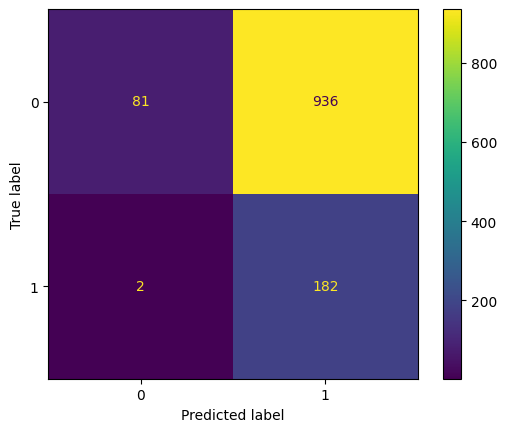

In [19]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

nb_cm = confusion_matrix(y_test, y_pred, labels = nb.classes_)
nb_cm = ConfusionMatrixDisplay(nb_cm, display_labels = nb.classes_)

nb_cm.plot()

leveraged and reused code from code reuse session 2:
```
from sklearn.metrics import RocCurveDisplay

logreg = RocCurveDisplay.from_estimator(logreg, X_test, y_test)
```



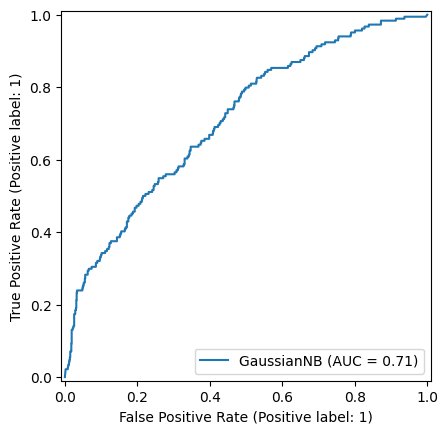

In [20]:
#import the function to desplay roc curve
from sklearn.metrics import RocCurveDisplay
#display the roc curve
nb_roc = RocCurveDisplay.from_estimator(nb, X_test, y_test)


Best Parameters: {'var_smoothing': 1e-05}

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      1017
           1       0.29      0.51      0.37       184

    accuracy                           0.73      1201
   macro avg       0.59      0.64      0.60      1201
weighted avg       0.80      0.73      0.76      1201



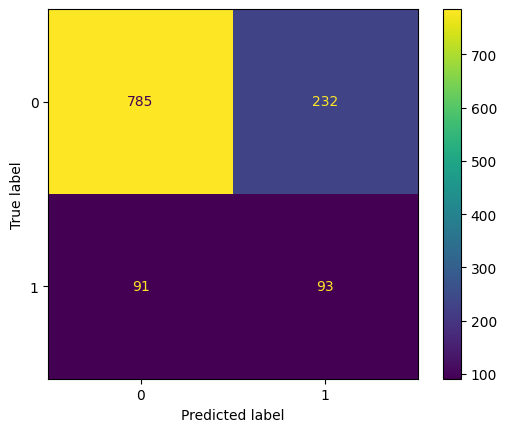

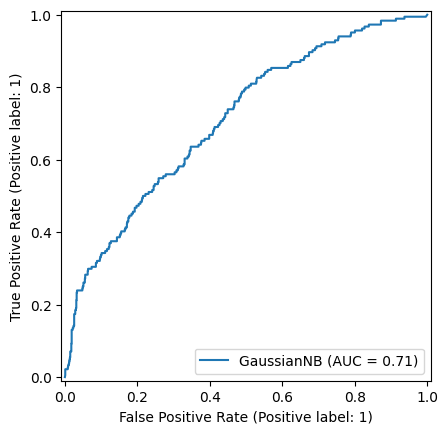

In [21]:
gnb = GaussianNB()
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

#GridSearchCV for hyperparameter tuning
grid = GridSearchCV(gnb, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

#Best model and prediction
best_gnb = grid.best_estimator_
y_pred = best_gnb.predict(X_test)
y_prob = best_gnb.predict_proba(X_test)[:, 1]

#Evaluation
print("Best Parameters:", grid.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=best_gnb.classes_)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_gnb.classes_)
disp_cm.plot()

#ROC Curve
RocCurveDisplay.from_estimator(best_gnb, X_test, y_test)

# **K-Nearest Neighbour (KNN)**

leveraged and reused code from code reuse session 2:
```
knn = KNeighborsClassifier(n_neighbors = value)
```



In [22]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 9)
# Fit the classifier to the data
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=9)

leveraged and reused code from code reuse session 2:
```
knn.predict(X_test)*italicized text*
```



In [23]:
#Perform predictions on the test data
y_prediction=knn.predict(X_test)
#Create a dataframe for comparing the actual vs predicted results by kNN mode
compare_results_knn_df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
compare_results_knn_df


,Actual,Predicted
2826,0,0
3099,0,0
672,0,0
18,0,0
1978,0,0
...,...,...
186,0,0
1193,0,1
2072,1,1
1106,0,1


In [24]:
#generate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1017
           1       0.44      0.09      0.15       184

    accuracy                           0.84      1201
   macro avg       0.65      0.54      0.53      1201
weighted avg       0.79      0.84      0.80      1201



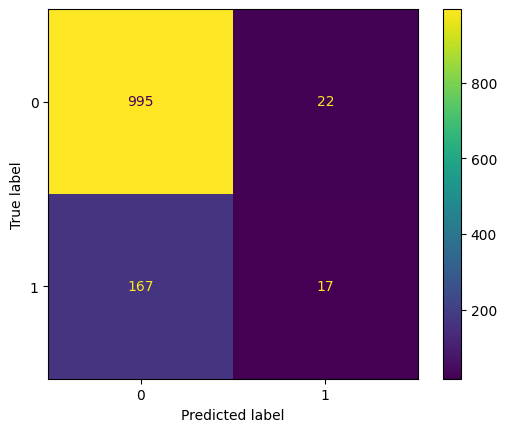

In [25]:
#Import the packages for costructing the confusion matrix
from sklearn.metrics import confusion_matrix

#Import the packages for plotting the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Costruct the confusion matrix based on…
#comparing actual values (y_test) vs predicted (y_pred) in test data
cm_knn = confusion_matrix(y_test, y_prediction, labels = knn.classes_)

#Plot the confusion matrix
disp_knn_cm = ConfusionMatrixDisplay(cm_knn, display_labels=knn.classes_)
disp_knn_cm.plot()


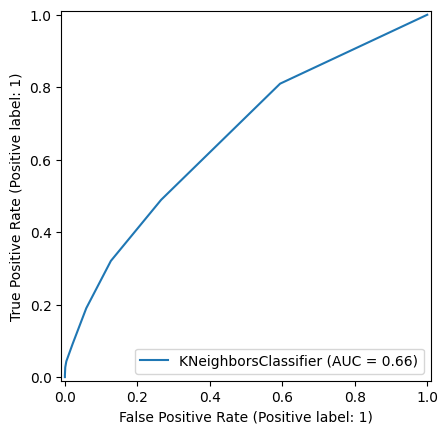

In [26]:
from sklearn.metrics import RocCurveDisplay
knn_roc = RocCurveDisplay.from_estimator(knn, X_test, y_test)


leveraged and reused code from tutorial session 3 week 4:
```
# Calculating error for K values between 1 and 40
error = []
import numpy as np
import matplotlib.pyplot as plt
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train, y_train)
    pred_i = knn2.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

```



Text(0, 0.5, 'Mean Error')

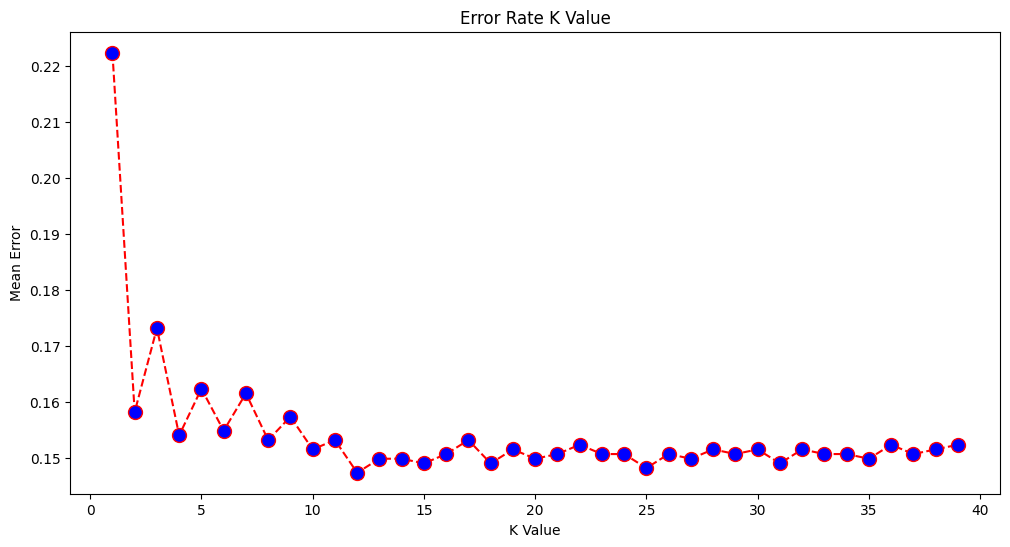

In [27]:
# Calculating error for K values between 1 and 40
error = []
import numpy as np
import matplotlib.pyplot as plt
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train, y_train)
    pred_i = knn2.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [28]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier
knn5 = KNeighborsClassifier(n_neighbors = 25)
# Fit the classifier to the data
knn5.fit(X_train,y_train)
#Perform predictions on the test data
y_prediction5 = knn5.predict(X_test)


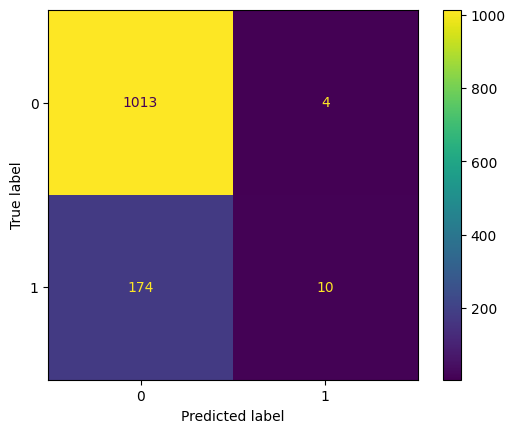

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_knn5 = confusion_matrix(y_test, y_prediction5, labels = knn5.classes_)
disp_knn5_cm = ConfusionMatrixDisplay(cm_knn5, display_labels=knn5.classes_)
disp_knn5_cm.plot()


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction5))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1017
           1       0.71      0.05      0.10       184

    accuracy                           0.85      1201
   macro avg       0.78      0.53      0.51      1201
weighted avg       0.83      0.85      0.79      1201



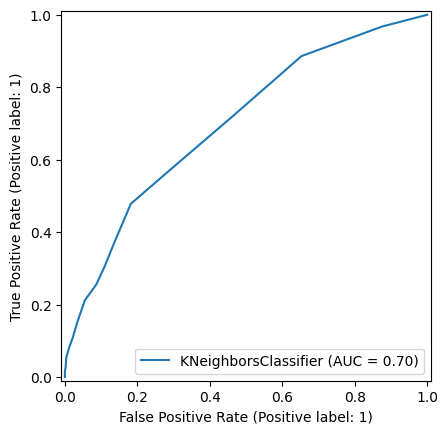

In [31]:
from sklearn.metrics import RocCurveDisplay
knn5_roc = RocCurveDisplay.from_estimator(knn5, X_test, y_test)


leveraged and reused code from code reuse session 2:
```
from sklearn.model_selection import GridSearchCV

param_grid = {'hyperparameter1': values, 'hyperparameter2': values, hyperparameter3': values, ...}

AlgorithmName_gscv = GridSearchCV(AlgorithmName, param_grid, cv = value)

AlgorithmName_gscv.fit(X, y)

AlgorithmName_gscv.best_params_

```



In [32]:
from sklearn.model_selection import GridSearchCV
import numpy as np
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors and distances
param_grid = {'n_neighbors': [1,3,5,9,11,13], 'weights':['uniform','distance'],'metric': ['euclidean', 'manhattan']}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring = 'roc_auc')
#fit model to data
knn_gscv.fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [33]:
# Check top performing n_neighbors’ value
knn_gscv.best_params_

{'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1017
           1       0.79      0.14      0.24       184

    accuracy                           0.86      1201
   macro avg       0.83      0.57      0.58      1201
weighted avg       0.85      0.86      0.82      1201



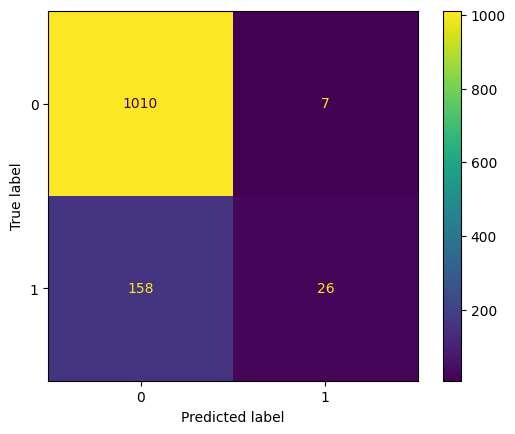

In [34]:

# Perform testing on test dataset
y_prediction = knn_gscv.predict(X_test)
# Construct a confusion matrix
cm_knn_gscv = confusion_matrix(y_test, y_prediction, labels = knn_gscv.classes_)
disp_knn_gscv_cm = ConfusionMatrixDisplay(cm_knn_gscv, display_labels=knn_gscv.classes_)
disp_knn_gscv_cm.plot()
# Display the classification report
print(classification_report(y_test, y_prediction))


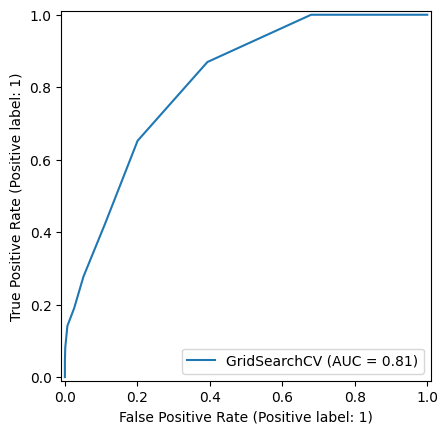

In [35]:
from sklearn.metrics import RocCurveDisplay
knn_gscv_roc = RocCurveDisplay.from_estimator(knn_gscv, X_test, y_test)
